In [1]:
import pandas as pd
import numpy as np
folder = 'd:/git/project1/data'

In [2]:
#data = pd.read_csv(f'{folder}/last_hs_tweets_ch1_0.csv')
#data

In [2]:
#cols = ['date', 'change_1_direct', 'change_3_direct', 'change_7_direct', 'change_30_direct', 'change_90_direct']
cols = ['change_1_direct']
changes = pd.read_csv(f'{folder}/tweets_change_padded.csv', usecols=cols)
changes

,change_1_direct
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
807251,0.0
807252,0.0
807253,1.0
807254,0.0


In [3]:
def load_parts(name, start, end):
    count = 1000
    data = pd.DataFrame(None)
    
    for num in range(start, end):
        start_index = num*count
        end_index = start_index + count - 1
        data_part = pd.read_csv(f'{folder}/{name}_{start_index}.csv', usecols=range(770))
        df = pd.DataFrame(np.array(changes.loc[start_index:end_index, cols]), columns=cols)
        union = pd.concat([data_part, df], axis=1)
        
        data = data.append(union, sort=False, ignore_index=True)
    #res_table.to_csv(f'{folder}\cls_direct30_{num}.csv', index=False)
    return data

In [4]:
%%time
raw_data = load_parts('last_hs_tweets_ch', 0, 100)
raw_data

Wall time: 3min 54s


,0,1,2,3,4,5,6,7,8,9,...,761,762,763,764,765,766,767,retweet,time,change_1_direct
0,-0.417784,-0.159195,0.049453,-0.019281,-0.143110,-0.371498,0.205367,0.469781,-0.180655,0.086964,...,-0.729234,0.435944,0.665804,-0.087694,-0.412030,-0.138853,0.688434,7.0,45736,1.0
1,-0.154517,-0.305308,0.424442,-0.002735,-0.164633,-0.258918,0.182587,0.578418,-0.027604,-0.099199,...,-0.320284,0.295116,0.262499,-0.145339,-0.557404,0.249221,0.425408,68.0,29586,1.0
2,0.000540,-0.246681,0.059547,-0.272320,-0.436857,-0.234840,0.253098,0.908152,0.024199,-0.300646,...,-0.264831,0.263115,-0.038263,-0.094645,-0.439378,0.201307,0.520169,4.0,75329,1.0
3,0.097781,-0.031261,0.059328,0.297294,-0.162170,-0.514269,0.549677,0.571328,-0.091938,-0.208955,...,-0.419469,0.434312,0.067487,-0.082194,-0.356370,-0.015842,0.434768,85.0,63389,1.0
4,-0.405389,-0.342308,0.293121,0.140589,-0.473491,-0.248678,0.463207,0.182642,-0.361493,-0.363156,...,-0.019985,0.224207,0.206847,-0.075846,-0.508190,0.142789,0.311084,8.0,5857,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.190831,0.111325,-0.007943,0.209162,-0.204160,-0.366423,0.579954,0.380756,-0.227440,-0.128254,...,-0.072001,0.233051,0.408162,-0.304246,-0.348964,0.134679,0.743559,2.0,79202,0.0
99996,0.176868,-0.362221,0.074079,0.066585,-0.009989,-0.425526,0.353912,0.466246,-0.058196,-0.264946,...,-0.420290,0.151437,0.422059,-0.445005,-0.381655,0.032492,0.645175,2.0,78964,1.0
99997,-0.086020,-0.137973,-0.054955,0.038759,-0.090016,-0.238761,0.160697,0.416090,-0.034831,-0.027933,...,-0.216983,0.200104,0.159398,-0.170248,-0.418308,0.369494,0.665510,2.0,78625,1.0
99998,0.168974,-0.353340,0.055526,0.063732,-0.014129,-0.439472,0.354419,0.485233,-0.063634,-0.269874,...,-0.418296,0.141576,0.423993,-0.450304,-0.378812,0.031307,0.658095,2.0,78343,1.0


In [7]:
raw_data['retweet'].max()

181240.0

In [8]:
max = 181240
raw_data['retweet'] = raw_data['retweet'].apply(lambda x: (x - max/2)/(max/2))
raw_data['retweet'].max()

1.0

In [9]:
raw_data['time'].max()

86399

In [10]:
max = 86000
raw_data['time'] = raw_data['time'].apply(lambda x: (x - max/2)/(max/2))
raw_data['time'].max()

1.0092790697674419

In [11]:
raw_data['date'].max()

1559934000.0

In [12]:
raw_data['date'].min()

1380567600.0

In [13]:
min = 1380567600
max = 1559934000
raw_data['date'] = raw_data['date'].apply(lambda x: (x - min)/(max-min))
raw_data['date'].max()

1.0

In [14]:
raw_data['date'].min()

0.0

In [5]:
%%time
#shaffle
raw_data = raw_data.sample(frac=1)
raw_data

Wall time: 2.54 s


,0,1,2,3,4,5,6,7,8,9,...,761,762,763,764,765,766,767,retweet,time,change_1_direct
40873,0.154078,-0.201394,0.026564,0.217482,-0.117782,-0.712478,0.040226,0.649390,0.190963,-0.307655,...,-0.607841,0.322955,0.457741,-0.102821,-0.443432,0.124357,0.630489,35.0,30493,1.0
832,0.110829,0.087697,0.203372,-0.178707,-0.642821,-0.543686,0.277545,0.589370,-0.150682,-0.450952,...,-0.354488,0.312999,0.259520,-0.103768,-0.588483,0.249900,0.225558,21.0,67411,1.0
58367,0.389685,-0.070361,0.226413,0.011184,-0.218933,-0.453032,0.584852,0.535753,-0.016475,-0.470529,...,-0.505246,0.328158,-0.015673,0.022542,-0.277971,0.256051,0.558487,2.0,63557,1.0
26878,-0.166137,-0.135977,0.175625,0.177462,-0.134225,-0.336339,-0.011873,0.453432,-0.134633,-0.255964,...,-0.554123,0.428766,0.516216,-0.469654,-0.421126,0.073560,0.534384,2.0,46775,1.0
11913,-0.161652,-0.316417,0.087562,-0.180851,-0.263479,-0.251145,0.140881,0.424626,-0.035675,-0.417812,...,-0.716426,0.061558,0.553769,-0.220546,-0.231607,-0.058111,0.782034,7.0,82973,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8094,-0.009050,-0.120176,-0.218051,-0.091481,-0.084636,-0.249447,0.164419,0.769991,-0.129390,-0.380851,...,-0.254722,0.109970,0.102325,-0.203718,-0.189995,0.076426,0.542887,3.0,54504,1.0
18064,-0.268845,-0.285695,0.190564,-0.009600,-0.218369,-0.083192,0.098382,0.317847,0.057382,-0.158775,...,-0.433835,0.000949,0.106776,-0.236143,-0.265077,0.033676,0.580178,2.0,60654,0.0
17745,0.209622,-0.083331,0.235984,0.099007,-0.574764,-0.488376,0.100918,0.543892,-0.268854,-0.158150,...,0.103803,0.262976,0.063059,-0.095611,-0.310393,0.297672,0.371484,3.0,71564,1.0
62218,-0.404304,0.309166,0.182504,-0.065580,-0.822769,-0.025005,0.732324,-0.050806,-0.079255,-0.318297,...,-0.295160,0.584818,-0.064049,-0.151786,-0.574533,0.430951,0.411983,57.0,38660,1.0


In [10]:
#%%time
#data.corr()[target].sort_values()
#train_size = 400000
train_size = 80000
data = raw_data.iloc[:train_size,:]
test = raw_data.iloc[train_size:,:]

In [11]:
%%time
#cols_num = 771
cols_num = 768
x_train = np.array(data.iloc[:,:cols_num])
x_train

Wall time: 704 ms


array([[ 0.1540783 , -0.20139408,  0.02656418, ..., -0.44343206,
         0.12435672,  0.63048863],
       [ 0.1108293 ,  0.08769724,  0.20337234, ..., -0.58848256,
         0.24989972,  0.22555758],
       [ 0.38968456, -0.07036075,  0.2264132 , ..., -0.27797145,
         0.25605115,  0.55848706],
       ...,
       [ 0.32227254,  0.07305242,  0.35339764, ..., -0.44655225,
         0.21078174,  0.821819  ],
       [-0.2651025 , -0.12942639, -0.05632295, ..., -0.22416812,
         0.18068723,  0.5076914 ],
       [-0.00671956,  0.14567634,  0.36557785, ..., -0.461772  ,
         0.50019807,  0.48612818]])

In [12]:
x_test = np.array(test.iloc[:,:cols_num])
x_test

array([[ 0.15888788, -0.00390368, -0.10173465, ..., -0.37399247,
         0.19761313,  0.43059814],
       [-0.11225191,  0.02365246, -0.2013041 , ..., -0.37025604,
         0.41310805,  0.6116906 ],
       [-0.6269896 , -0.38341638,  0.09743221, ..., -0.6797356 ,
         0.31627098,  0.5092034 ],
       ...,
       [ 0.20962176, -0.08333102,  0.23598449, ..., -0.31039286,
         0.29767215,  0.37148395],
       [-0.40430364,  0.30916557,  0.18250442, ..., -0.57453334,
         0.4309507 ,  0.41198274],
       [-0.4354161 ,  0.46326542, -0.25352922, ..., -0.51788056,
         0.55933785,  0.03935561]])

In [13]:
target = 'change_1_direct'
#data[target].value_counts()

In [14]:
y_train = data[target].astype(int)
#y_train = data[target].apply(lambda x: -1 if x < 1 else 1)
y_train.value_counts()

1    48254
0    31746
Name: change_1_direct, dtype: int64

In [15]:
y_test = test[target].astype(int)
#y_test = test[target].apply(lambda x: -1 if x < 1 else 1)
y_test.value_counts()

1    12092
0     7908
Name: change_1_direct, dtype: int64

In [16]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
d_class_weights = dict(enumerate(class_weights))
d_class_weights

{0: 1.26000126000126, 1: 0.8289468230613006}

In [17]:
import tensorflow
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers

In [18]:
model_num=50

In [19]:
#l2=0.05
lr=0.02

model = models.Sequential()

# activity_regularizer=regularizers.l2(l2), 
model.add(layers.Dense(400, input_shape=(cols_num,), kernel_initializer="he_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(400, kernel_initializer="he_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

rmsprop = optimizers.RMSprop(learning_rate=lr, rho=0.9)
adam = optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, amsgrad=True)
adamax = optimizers.Adamax(learning_rate=lr, beta_1=0.9, beta_2=0.99)
nadam = optimizers.Nadam(learning_rate=lr, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['binary_accuracy'])
print(model_num)
model_num+=1

50


In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
weights_file = f'{folder}/weights_pr4_{model_num}.h5'
save_weights = ModelCheckpoint(weights_file, monitor='val_binary_accuracy', mode='max', save_best_only=True)
tensorboard_cbk = TensorBoard(log_dir=f'{folder}/logs')
reduce = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=0.000001, verbose=1)

In [22]:
json_file = f'{folder}/model_pr4_{model_num}.json'
model_json = model.to_json()

with open(json_file, 'w') as file:
    file.write(model_json)

In [23]:
history = model.fit(x_train, y_train, class_weight=d_class_weights, epochs=25, batch_size=4000, validation_split=0.5, callbacks=[save_weights, tensorboard_cbk, reduce])


Epoch 1/25
10/10 [==============================] - 12s 1s/step - loss: 1.2844 - binary_accuracy: 0.5308 - val_loss: 3.9809 - val_binary_accuracy: 0.5227
Epoch 2/25
10/10 [==============================] - 5s 529ms/step - loss: 0.7315 - binary_accuracy: 0.5884 - val_loss: 2.1681 - val_binary_accuracy: 0.5668
Epoch 3/25
10/10 [==============================] - 6s 570ms/step - loss: 0.6984 - binary_accuracy: 0.5963 - val_loss: 0.8501 - val_binary_accuracy: 0.6285
Epoch 4/25
10/10 [==============================] - 6s 655ms/step - loss: 0.6766 - binary_accuracy: 0.6196 - val_loss: 0.8894 - val_binary_accuracy: 0.6086
Epoch 5/25
10/10 [==============================] - 6s 587ms/step - loss: 0.6693 - binary_accuracy: 0.6276 - val_loss: 0.7611 - val_binary_accuracy: 0.6244
Epoch 6/25
10/10 [==============================] - 6s 588ms/step - loss: 0.6693 - binary_accuracy: 0.6263 - val_loss: 0.7370 - val_binary_accuracy: 0.6291
Epoch 7/25
10/10 [==============================] - 6s 590ms/step 

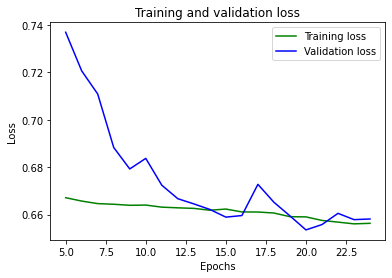

In [24]:
import matplotlib.pyplot as plt
start = 5
loss_values = history.history['loss'][start:]
val_loss_values = history.history['val_loss'][start:]
epochs = range(start, len(loss_values) + start)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

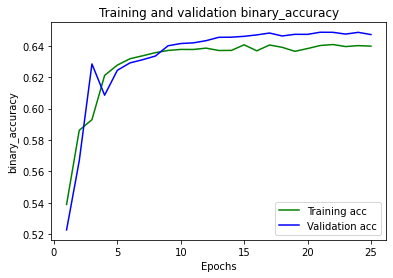

In [25]:
plt.clf()
acc_values = history.history['binary_accuracy']
val_acc_values = history.history['val_binary_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'g', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation binary_accuracy')
plt.xlabel('Epochs')
plt.ylabel('binary_accuracy')
plt.legend()
plt.show()

In [26]:
results = model.evaluate(x_test, y_test, verbose=1)

625/625 [==============================] - 3s 4ms/step - loss: 0.6581 - binary_accuracy: 0.6468


In [27]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
clf_dummy = DummyClassifier()

scores = cross_val_score(clf_dummy, x_test, y_test)
print("Dummy classifier score: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Dummy classifier score: 0.605 (+/- 0.00)


In [132]:
predictions = model.predict(x_test)
predictions.T

array([[0.3760522 , 0.5893599 , 0.2978202 , ..., 0.36077154, 1.        ,
        0.57056653]], dtype=float32)

In [37]:
threshold = 0.5
predictions_df = pd.DataFrame()
predictions_df[target] = [1 if val > threshold else 0 for val in predictions]
predictions_df[target].value_counts()

1    35576
0    14424
Name: change_1_direct, dtype: int64

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [ ]:
print(f1_score(y_test, predictions_df[target], average='binary'))

In [39]:
print(roc_auc_score(predictions_df[target], y_test))
print(confusion_matrix(predictions_df[target], y_test))
print(accuracy_score(predictions_df[target], y_test))

[[11841  2583]
 [14381 21195]]
0.66072


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [53]:
%%time
parameters = {'C': np.linspace(0.0001, 100, 20)}
grid_search = GridSearchCV(LogisticRegression(solver="saga"), parameters)
grid_search.fit(x_train, y_train)

print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
 

D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
 

D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
 

best parameters:  {'C': 0.0001}
best scrores:  0.8089999999999999
Wall time: 1min 55s


In [54]:
%%time
clf = LogisticRegression(solver="warn", C=1)
clf.fit(x_train, y_train)

Wall time: 832 ms


LogisticRegression(C=0.0001, solver='saga')

In [55]:
clf.score(x_test, y_test)

0.783

In [ ]:
pd.DataFrame(data={'score': model['lr'].coef_[0]},
                      index=column_names).sort_values(by='score')
                                         .plot(kind='barh', grid=True,
                                               figsize=(6,6), legend=False)

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
%%time
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(x_train, y_train)

Wall time: 17.5 s


RandomForestClassifier(n_estimators=1000)

In [65]:
rf.score(x_test, y_test)

0.787

In [63]:
rf_pred = rf.predict(x_test)

In [67]:
#print(roc_auc_score(predictions_df[target], y_test))
print(confusion_matrix(rf_pred, y_test))
print(accuracy_score(rf_pred, y_test))

[[783 213]
 [  0   4]]
0.787


In [ ]:
pd.DataFrame(data={'score': model['rf'].feature_importances_}, 
                      index=column_names).sort_values(by='score')
                                         .plot(kind='barh', grid=True,
                                               figsize=(6,6), legend=False)